In [1]:
import pandas as pd
import numpy as np

In [2]:
import glob
#get all the file path under Sales_Data file
files= glob.glob('/Users/hayashishifuchi/Desktop/My_Projects/Sales_analysis/Sales_Data'+'/*')

### Task #1: Merge the 12 months of sales data into a single CSV file

In [3]:
df = (pd.read_csv(f, sep=',') for f in files)
df

<generator object <genexpr> at 0x7f92aa7a4950>

In [4]:
df_merged = pd.concat(df, ignore_index=True)
df_merged.to_csv( "all_months.csv")

In [5]:
df=pd.read_csv('all_months.csv')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [6]:
df=df.drop(columns=['Unnamed: 0'])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


## Task #2 : what was the best month for sales? How much was earned that month?

In [7]:
# df.loc[0, 'Quantity Ordered']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
df=df.dropna()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [10]:
df.isnull().sum()
pd.set_option('display.max_rows', 30)
print(df.shape)
# z=df.loc[185950, 'Quantity Ordered']
# z=pd.to_numeric(z)
# type(z)
df = df[df['Order ID'] != 'Order ID']
print(df.shape)

(186305, 6)
(185950, 6)


In [11]:
#pd.set_option('display.max_rows', None)

df[['Quantity Ordered', 'Price Each']]=df[['Quantity Ordered', 'Price Each']].apply(pd.to_numeric)

/Users/hayashishifuchi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [12]:
df['earned']=df['Quantity Ordered']*df['Price Each']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   earned            185950 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 11.3+ MB


/Users/hayashishifuchi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,earned
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",2.99
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",149.99
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",11.95
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",11.95


In [14]:
#type(df.loc[0,'Order Date'][:2])
df['Month']=df['Order Date'].apply(lambda x: x[:2]).apply(pd.to_numeric)
df

/Users/hayashishifuchi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,earned,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",2.99,6
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",149.99,6
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",11.95,6
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",11.95,6


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   earned            185950 non-null  float64
 7   Month             185950 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 12.8+ MB


In [16]:
month_revenue=df.groupby('Month')['earned'].sum()

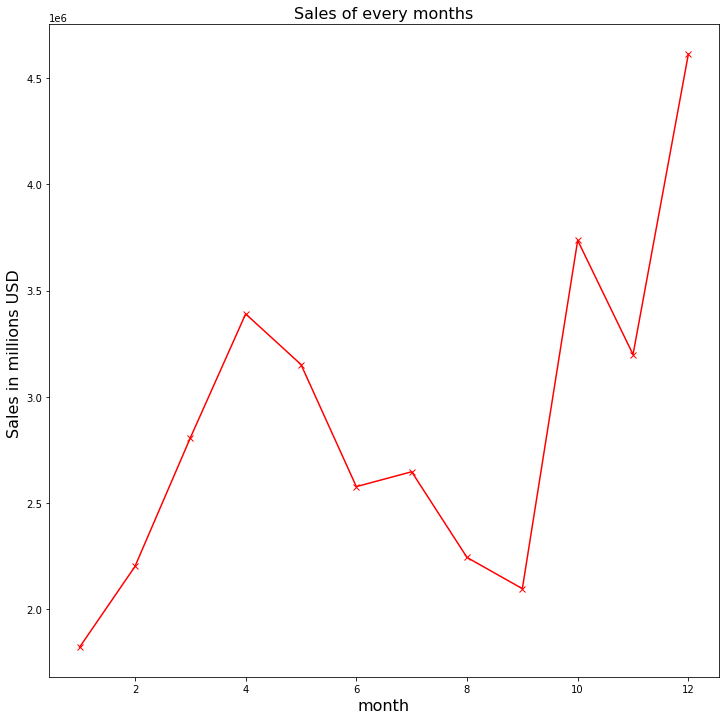

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.title('Sales of every months', fontsize=16)
plt.xlabel('month', fontsize=16)
plt.ylabel('Sales in millions USD ', fontsize=16)
plt.plot(month_revenue, c='r', marker='x')
plt.show()

In [18]:
month_revenue.sort_values(ascending=False)

Month
12    4.613443e+06
10    3.736727e+06
4     3.390670e+06
11    3.199603e+06
5     3.152607e+06
3     2.807100e+06
7     2.647776e+06
6     2.577802e+06
8     2.244468e+06
2     2.202022e+06
9     2.097560e+06
1     1.822257e+06
Name: earned, dtype: float64

### Task 2 answer is December with sales of 4.613443e+06

In [19]:
df.groupby('Month').sum()

,Quantity Ordered,Price Each,earned
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


### #Now Check the correlation between different features

In [20]:
og_df=df.copy()


for col in df.columns:
    c = df[col].astype('category')
    d = dict(enumerate(c.cat.categories))
    #df['code'] = df[col].astype('category').cat.codes
    df[col]=df[col].astype('category').cat.codes
#     df['level_back'] = df['code'].map(d)


/Users/hayashishifuchi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,earned,Month
0,154431,13,0,16,141313,5881,51,11
1,154432,11,0,13,140789,72442,43,11
2,154433,15,0,2,131536,27897,6,11
3,154434,2,0,7,137096,48818,32,11
4,154435,15,0,2,134800,51802,6,11
...,...,...,...,...,...,...,...,...
186845,81671,5,0,0,58160,108843,0,5
186846,81672,2,0,7,56024,61852,32,5
186847,81673,15,0,2,63564,34446,6,5
186848,81674,15,0,2,64927,127857,6,5


In [22]:
og_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,earned,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",2.99,6
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",149.99,6
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",11.95,6
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",11.95,6


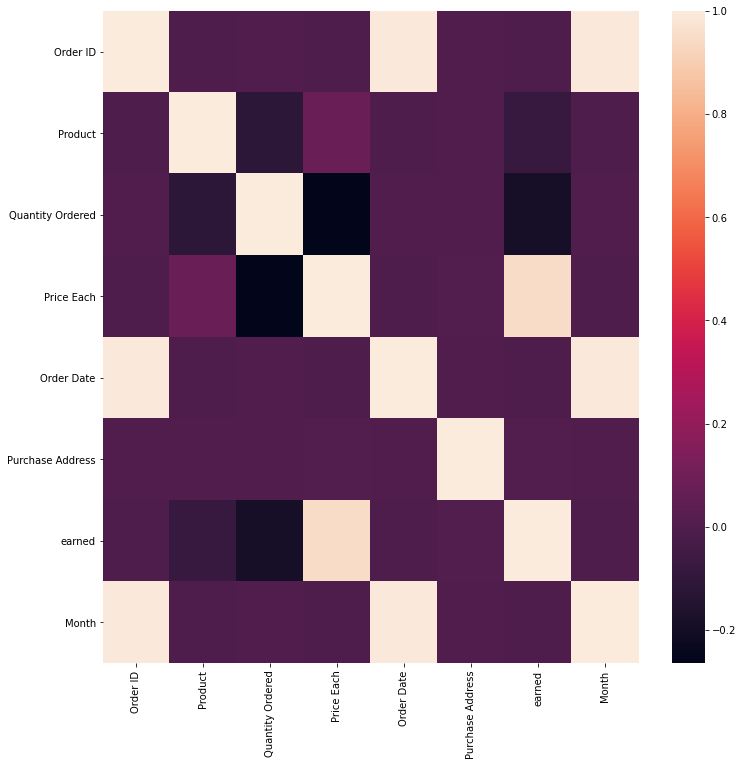

                  Order ID   Product  Quantity Ordered  Price Each  \
Order ID          1.000000 -0.002569          0.000702   -0.005288   
Product          -0.002569  1.000000         -0.114337    0.077964   
Quantity Ordered  0.000702 -0.114337          1.000000   -0.264151   
Price Each       -0.005288  0.077964         -0.264151    1.000000   
Order Date        0.990721 -0.002594          0.001025   -0.006113   
Purchase Address  0.000799  0.000079          0.000542    0.004072   
earned           -0.004769 -0.079937         -0.189376    0.948920   
Month             0.993063 -0.002564          0.000791   -0.005962   

                  Order Date  Purchase Address    earned     Month  
Order ID            0.990721          0.000799 -0.004769  0.993063  
Product            -0.002594          0.000079 -0.079937 -0.002564  
Quantity Ordered    0.001025          0.000542 -0.189376  0.000791  
Price Each         -0.006113          0.004072  0.948920 -0.005962  
Order Date          1.00

In [23]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())
plt.show()

print(df.corr())

In [24]:
c = df.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so

Order ID          Order ID            1.000000
Product           Product             1.000000
earned            earned              1.000000
Purchase Address  Purchase Address    1.000000
Order Date        Order Date          1.000000
                                        ...   
Quantity Ordered  Product            -0.114337
                  earned             -0.189376
earned            Quantity Ordered   -0.189376
Quantity Ordered  Price Each         -0.264151
Price Each        Quantity Ordered   -0.264151
Length: 64, dtype: float64

## Task #3: What city had the highest number of sales?

In [25]:
df=og_df

In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,earned,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   earned            185950 non-null  float64
 7   Month             185950 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 12.8+ MB


In [28]:
df['city']=df['Purchase Address'].apply(lambda x: x.split(',')[-1][1:3])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,earned,Month,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00,12,NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00,12,NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95,12,NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99,12,CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95,12,GA


In [29]:
city=df.groupby('city').sum()
city

,Quantity Ordered,Price Each,earned,Month
city,,,,
CA,83528,1.363290e+07,1.371477e+07,523845
GA,16602,2.779908e+06,2.795499e+06,104794
MA,22528,3.637410e+06,3.661642e+06,141112
ME,2750,4.471893e+05,4.497583e+05,17144
NY,27932,4.635371e+06,4.664317e+06,175741
OR,11303,1.860558e+06,1.870732e+06,70621
TX,27883,4.562501e+06,4.587557e+06,174449
WA,16553,2.733296e+06,2.747755e+06,104941


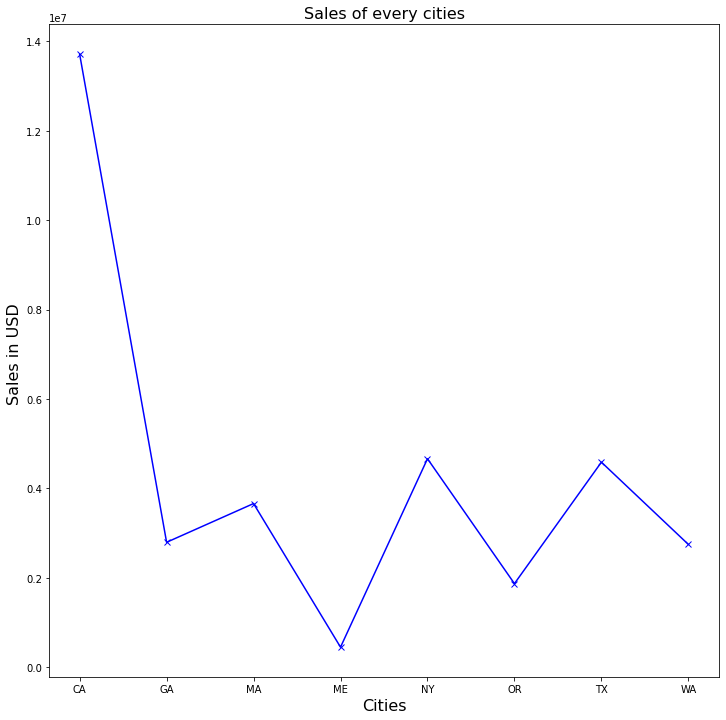

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.title('Sales of every cities', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.ylabel('Sales in USD ', fontsize=16)
plt.plot(city['earned'], c='b', marker='x')
plt.show()

## Task #3: What time should we display advertisements to maxzimize the likeihood of customers buying product?

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   earned            185950 non-null  float64
 7   Month             185950 non-null  int64  
 8   city              185950 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 14.2+ MB


In [32]:
df[['Order Date']].head()
#type(df.loc[0, 'Order Date'])


,Order Date
0,12/30/19 00:01
1,12/29/19 07:03
2,12/12/19 18:21
3,12/22/19 15:13
4,12/18/19 12:38


In [33]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,earned,Month,city
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,GA


In [34]:
df.loc[0, 'Order Date']

Timestamp('2019-12-30 00:01:00')

In [35]:
df['purchase hour']=df['Order Date'].apply(lambda x: x.hour)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,earned,Month,city,purchase hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,NY,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,NY,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,NY,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,CA,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,GA,12


In [36]:
hour_earned=df.groupby('purchase hour').sum()
hour_earned['purchase hour']=hour_earned.index
hour_earned.reset_index(drop=True, inplace=True)
hour_earned

,Quantity Ordered,Price Each,earned,Month,purchase hour
0,4428,709296.70,713721.27,27554,0
1,2619,458490.00,460866.88,16657,1
2,1398,233833.64,234851.44,8507,2
3,928,144726.42,145757.89,5904,3
4,937,162058.18,162661.01,6148,4
5,1493,229621.21,230679.82,9301,5
6,2810,445000.11,448113.00,17539,6
7,4556,740568.11,744854.12,28850,7
8,7002,1185970.62,1192348.97,43626,8
9,9816,1628498.49,1639030.58,60981,9


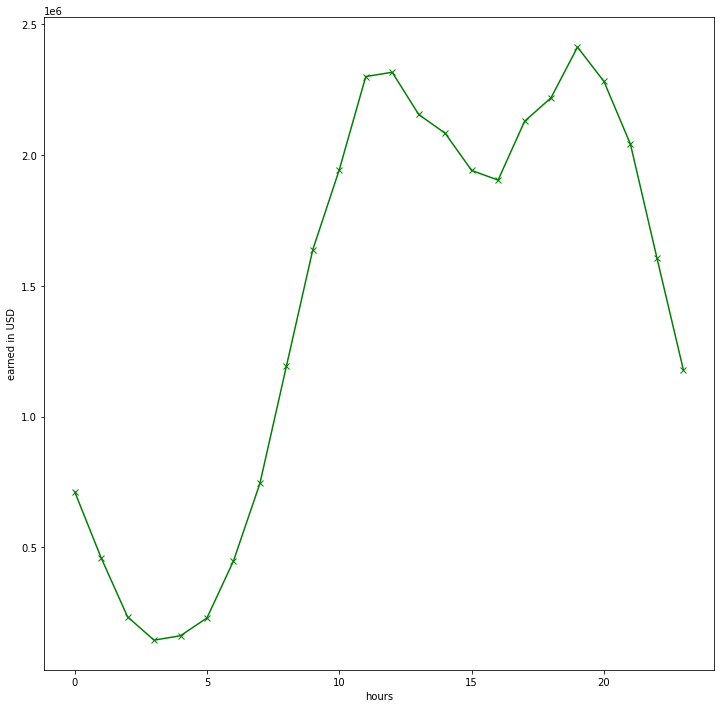

In [37]:

plt.figure(figsize=(12,12))
plt.plot(hour_earned['purchase hour'], hour_earned['earned'], color='g', marker='x')
plt.xlabel('hours')
plt.ylabel('earned in USD')
plt.show()

In [38]:
hour_earned.sort_values('earned', ascending=False)

,Quantity Ordered,Price Each,earned,Month,purchase hour
19,14470,2398588.31,2412938.54,91389,19
12,14202,2299876.68,2316821.34,89161,12
11,14005,2288855.18,2300610.24,87654,11
20,13768,2268185.16,2281716.24,86375,20
18,13802,2207696.93,2219348.30,86421,18
13,13685,2139743.86,2155389.80,85808,13
17,12229,2116777.02,2129361.61,77454,17
14,12362,2072194.77,2083672.73,77836,14
21,12244,2030763.83,2042000.86,77103,21
10,12308,1932665.62,1944286.77,76928,10


## Task #4: what products are most often sold together?

In [39]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,earned,Month,city,purchase hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,NY,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,NY,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,NY,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,CA,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,GA,12


In [40]:
grouped_df = df.groupby('Order ID')

count=0
for key, item in grouped_df:
    if count==20:
        break
    print(grouped_df.get_group(key), '\n\n')
    count+=1

       Order ID Product  Quantity Ordered  Price Each          Order Date  \
137448   141234  iPhone                 1       700.0 2019-01-22 21:25:00   

                       Purchase Address  earned  Month city  purchase hour  
137448  944 Walnut St, Boston, MA 02215   700.0      1   MA             21   


       Order ID                   Product  Quantity Ordered  Price Each  \
137449   141235  Lightning Charging Cable                 1       14.95   

                Order Date                  Purchase Address  earned  Month  \
137449 2019-01-28 14:15:00  185 Maple St, Portland, OR 97035   14.95      1   

       city  purchase hour  
137449   OR             14   


       Order ID           Product  Quantity Ordered  Price Each  \
137450   141236  Wired Headphones                 2       11.99   

                Order Date                       Purchase Address  earned  \
137450 2019-01-17 13:33:00  538 Adams St, San Francisco, CA 94016   23.98   

        Month city  purchas

In [41]:
df.shape

(185950, 10)

In [42]:
temp=df.sort_values('Order ID')
temp.tail(200)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,earned,Month,city,purchase hour
24917,319478,Apple Airpods Headphones,1,150.00,2019-12-29 00:33:00,"376 Dogwood St, Seattle, WA 98101",150.00,12,WA,0
24918,319479,AAA Batteries (4-pack),1,2.99,2019-12-09 12:48:00,"130 Lakeview St, Dallas, TX 75001",2.99,12,TX,12
24919,319480,20in Monitor,1,109.99,2019-12-13 19:05:00,"965 7th St, Austin, TX 73301",109.99,12,TX,19
24920,319481,Bose SoundSport Headphones,1,99.99,2019-12-28 22:25:00,"424 Lakeview St, Austin, TX 73301",99.99,12,TX,22
24921,319482,Flatscreen TV,1,300.00,2019-12-27 13:28:00,"838 Highland St, Dallas, TX 75001",300.00,12,TX,13
...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,12,CA,20
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,12,CA,12
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,12,WA,6
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,12,TX,10


In [43]:
bundle=df[df['Order ID'].isin(df['Order ID'][df['Order ID'].duplicated()])].sort_values("Order ID")[['Order ID', 'Product']]

In [44]:
bundle

,Order ID,Product
137489,141275,USB-C Charging Cable
137490,141275,Wired Headphones
137505,141290,Apple Airpods Headphones
137506,141290,AA Batteries (4-pack)
137581,141365,Vareebadd Phone
...,...,...
25028,319584,Wired Headphones
25040,319596,iPhone
25041,319596,Lightning Charging Cable
25076,319631,34in Ultrawide Monitor


In [45]:
product_bundle=bundle.groupby('Order ID')['Product'].apply(lambda x: ','.join(x)).to_frame(name="products")
product_bundle.head()

,products
Order ID,
141275,"USB-C Charging Cable,Wired Headphones"
141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
141365,"Vareebadd Phone,Wired Headphones"
141384,"Google Phone,USB-C Charging Cable"
141450,"Google Phone,Bose SoundSport Headphones"


In [46]:
product_bundle['Order ID']=product_bundle.index
product_bundle.reset_index(drop=True, inplace=True)
product_bundle.head()

,products,Order ID
0,"USB-C Charging Cable,Wired Headphones",141275
1,"Apple Airpods Headphones,AA Batteries (4-pack)",141290
2,"Vareebadd Phone,Wired Headphones",141365
3,"Google Phone,USB-C Charging Cable",141384
4,"Google Phone,Bose SoundSport Headphones",141450


In [47]:
cols = product_bundle.columns.tolist()
cols
cols = cols[-1::-1]
product_bundle=product_bundle[cols]
product_bundle

,Order ID,products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
7131,319536,"Macbook Pro Laptop,Wired Headphones"
7132,319556,"Google Phone,Wired Headphones"
7133,319584,"iPhone,Wired Headphones"
7134,319596,"iPhone,Lightning Charging Cable"


In [48]:
product_bundle['Order ID']=product_bundle['Order ID'].apply(pd.to_numeric)

In [49]:
product_bundle['products'].mode()

0    iPhone,Lightning Charging Cable
dtype: object

In [52]:
product_bundle['products'].value_counts(ascending=False).head(200)

iPhone,Lightning Charging Cable                       678
Google Phone,USB-C Charging Cable                     651
iPhone,Wired Headphones                               287
Vareebadd Phone,USB-C Charging Cable                  250
iPhone,Apple Airpods Headphones                       232
                                                     ... 
27in FHD Monitor,Macbook Pro Laptop                     6
Wired Headphones,USB-C Charging Cable,Google Phone      6
Flatscreen TV,Flatscreen TV                             6
34in Ultrawide Monitor,Apple Airpods Headphones         5
Bose SoundSport Headphones,Macbook Pro Laptop           5
Name: products, Length: 200, dtype: int64